# Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



1) Carregue a base e garanta que a base está como deveria.

In [2]:

df = pd.read_csv('base_filtro.csv')

df.qt_pessoas_residencia = df.qt_pessoas_residencia.astype('int64')
df.posse_de_imovel = df.posse_de_imovel.map({'Y' : 1, 'N' : 0})
df.tipo_residencia = df.tipo_residencia.astype('category')
df.estado_civil = df.estado_civil.astype('category')
df.tempo_emprego = df.tempo_emprego.astype('int64')
df.tipo_renda = df.tipo_renda.astype('category')
df.educacao = df.educacao.astype('category')
df.sexo = df.sexo.map({'M' : 0, 'F': 1})
df.mau = df.mau.map({False: 1, True: 0})
df.idade = df.idade.astype('int64')

df = pd.get_dummies(df, columns=['tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first = True)
df.head()


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,0,58,3,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,1,0,52,8,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0,46,2,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,29,3,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,1,0,27,4,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [3]:

y = df.mau 


In [4]:

X = df.drop('mau', axis = 1) 


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)


2) Vamos para o modelo:

In [6]:

clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_train, y_train)


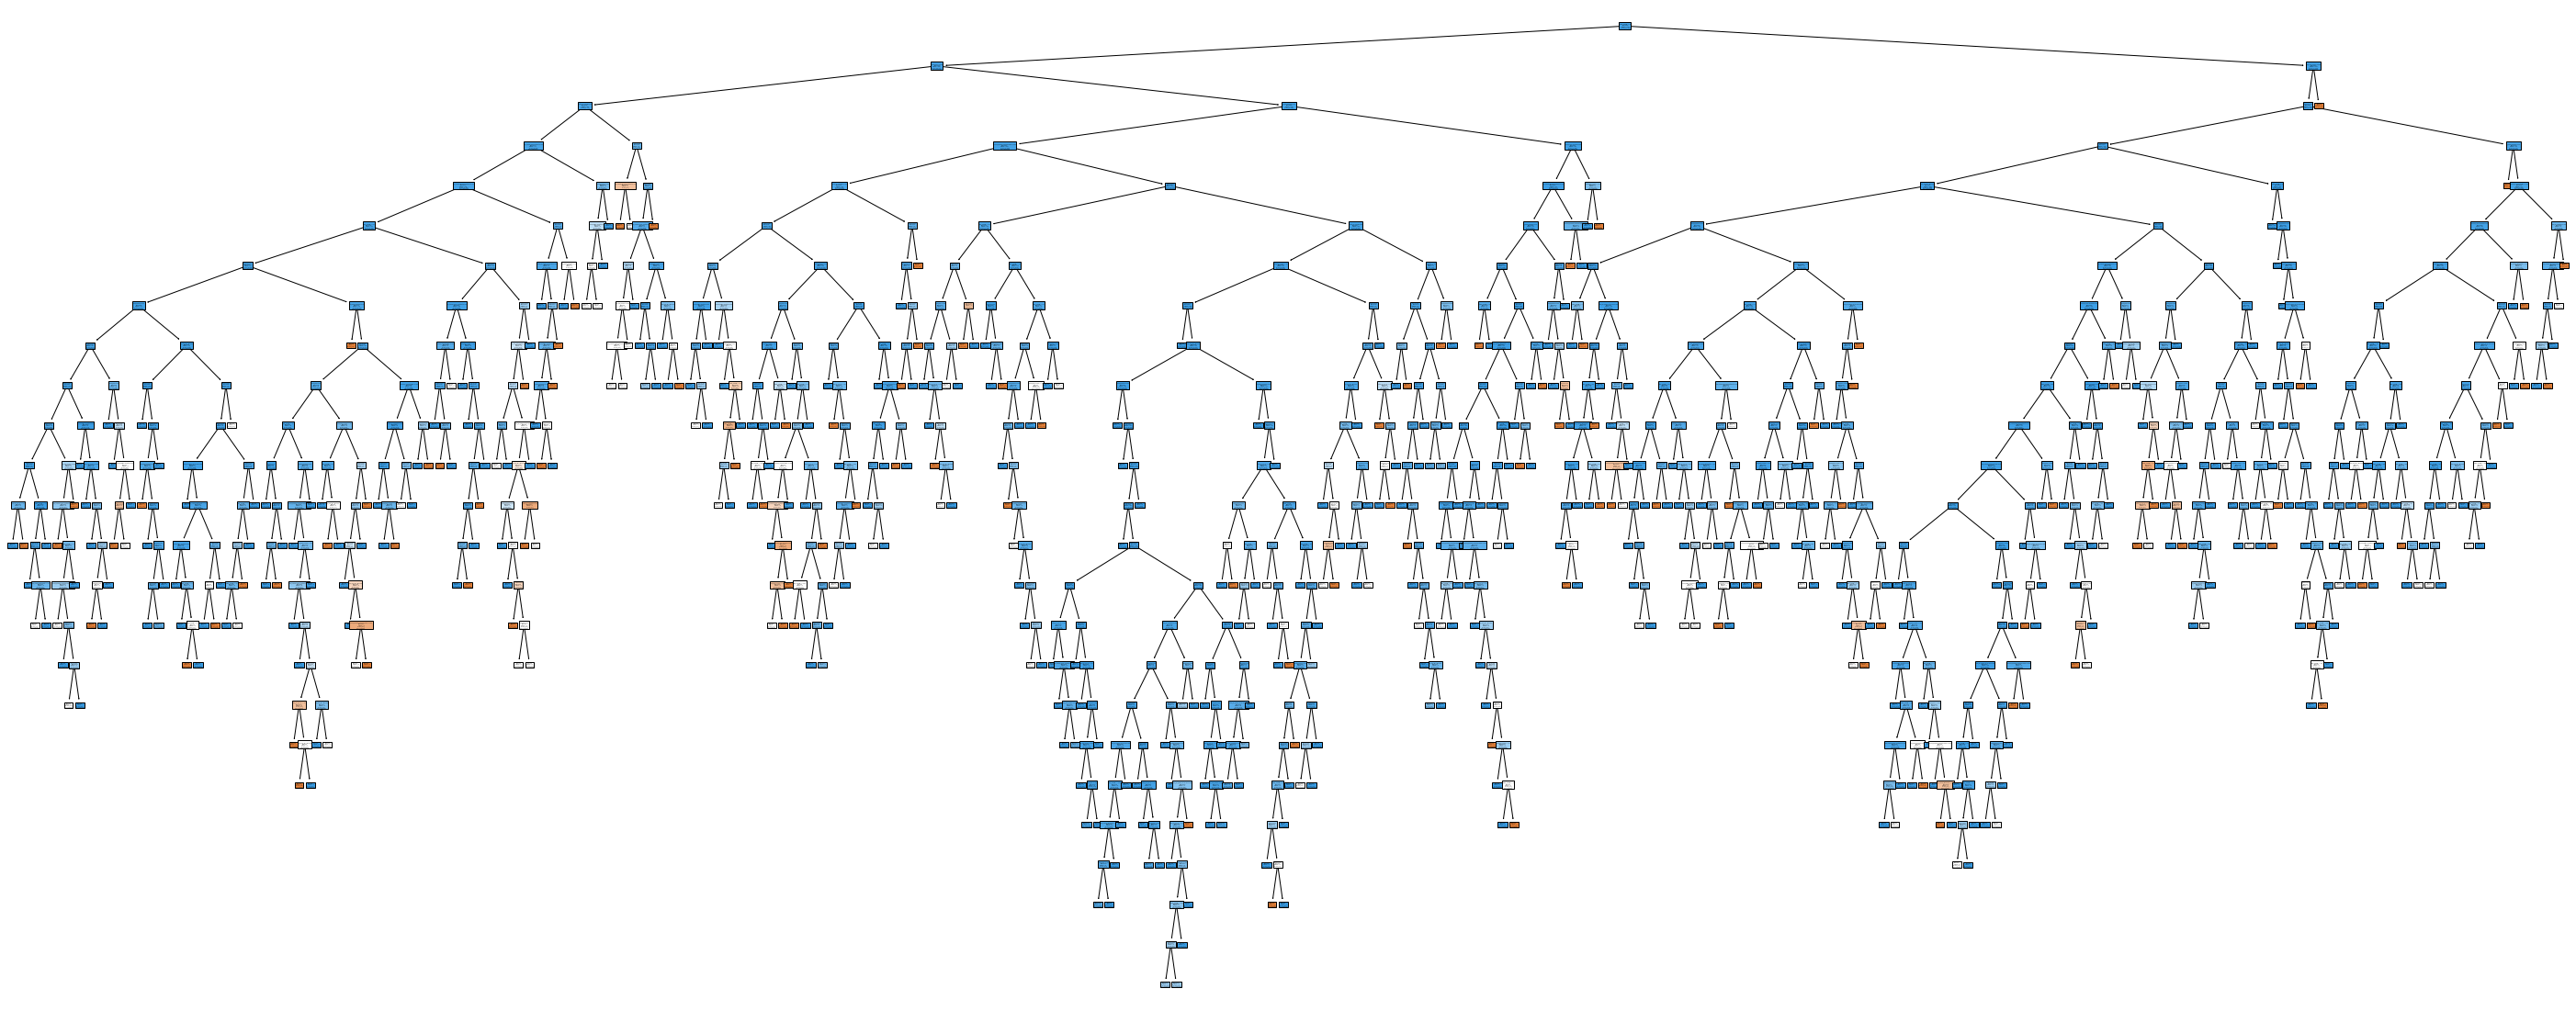

In [7]:
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(50, 20))

plot_tree(clf, filled=True, class_names=['Aprovado', 'Reprovado'],feature_names=X.columns);


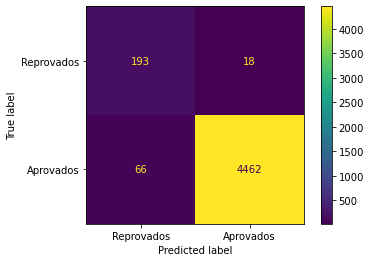

In [8]:

clf_treino = clf.predict(X_train)
plot_confusion_matrix(clf, X_train, y_train, display_labels = ['Reprovados', 'Aprovados']);


In [9]:

predict_treino = clf.predict(X_train)
accuracy_score(y_train, predict_treino)


0.982274741506647

3) Vamos avaliar o modelo na base de testes

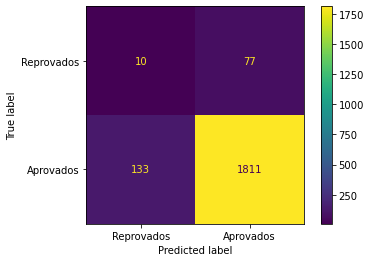

In [10]:

clf_treino = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, display_labels = ['Reprovados', 'Aprovados']);


In [22]:

predict_teste = clf.predict(X_test)
accuracy_score(y_test, predict_teste)


0.9487936976858691

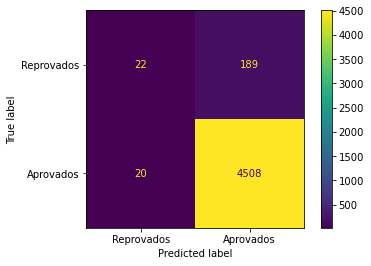

In [12]:

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict_treino = clf.predict(X_test)
clf_treino = clf.predict(X_train)
plot_confusion_matrix(clf, X_train, y_train, display_labels = ['Reprovados', 'Aprovados']);


In [13]:

accuracy_score(y_test, predict_treino)


0.9487936976858691

In [14]:
Aprovados = 4508

Total_Matrix = (4508 + 189 + 22 + 20)

print('Como ficaria a acurácia se você classificasse todos os contratos como "bons"? Aproximadamente \033[1;34m{:.2%}'.
      format(Aprovados/Total_Matrix).replace('.',',')
     )

Como ficaria a acurácia se você classificasse todos os contratos como "bons"? Aproximadamente 95,13%
